## Module 1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = [
    'Date', 'Time', 'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3'
]

data = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    na_values='?',
    names=column_names,
    header=None,
    skiprows=1,
    encoding='latin1',
    engine='python'
)
print(data.head())
print(data.shape)



         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
(2075259, 9)


In [7]:
print(data.info())
print(data.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB
None
              Date      Time  Global_active_power  Global_reactive_power  \
count      2075259   2075259         2.049280e+06           2.049280e+06   
unique        1442      1440                  NaN                    NaN   
top     25/11/2010  19:43:00                  NaN                    NaN   
freq          1440      1442                  NaN                    NaN   
mean           NaN       NaN         1.091615e+00    

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:0

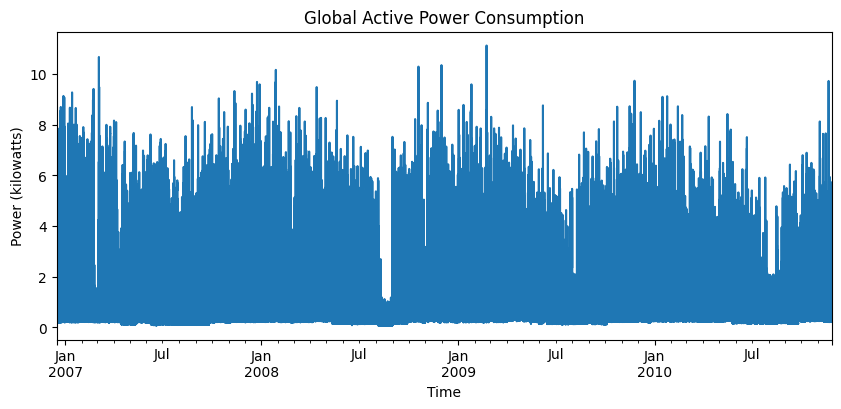

In [8]:
data[['Date', 'Time']].isnull().sum()
data['Datetime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

print(data.head())
data.set_index('Datetime', inplace=True)
data['Global_active_power'].plot(figsize=(10,4))
plt.title("Global Active Power Consumption")
plt.xlabel("Time")
plt.ylabel("Power (kilowatts)")
plt.show()

##Module 2

In [10]:
print(data.isnull().sum())
print(data.ffill(inplace=True))

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64
None


In [11]:
Q1 = data['Global_active_power'].quantile(0.25)
Q3 = data['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

data = data[
    (data['Global_active_power'] >= Q1 - 1.5 * IQR) &
    (data['Global_active_power'] <= Q3 + 1.5 * IQR)
]

# Drop non-numeric columns 'Date' and 'Time' before resampling
data_numeric = data.drop(columns=['Date', 'Time'])
print(data_numeric)
hourly_data = data_numeric.resample('h').mean() # Updated: Using 'h' instead of 'H'
print(hourly_data)
daily_data = data_numeric.resample('D').mean()
print(daily_data)

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:40:00                3.270                  0.152   236.73   
2006-12-16 17:42:00                3.266                  0.000   237.13   
2006-12-16 17:49:00                3.248                  0.000   236.66   
2006-12-16 17:50:00                3.236                  0.000   235.84   
2006-12-16 17:51:00                3.228                  0.000   235.60   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

           

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
hourly_data[['Voltage']] = scaler.fit_transform(
    hourly_data[['Voltage']]
)

print(hourly_data.head())

                     Global_active_power  Global_reactive_power   Voltage  \
Datetime                                                                    
2006-12-16 17:00:00             3.097333               0.023333  0.393080   
2006-12-16 18:00:00             2.664533               0.070000  0.372066   
2006-12-16 19:00:00             3.260714               0.049000  0.267895   
2006-12-16 20:00:00             3.189385               0.053744  0.295647   
2006-12-16 21:00:00             2.726938               0.069125  0.450161   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         13.066667             0.0        0.000000   
2006-12-16 18:00:00         11.360000             0.0        1.433333   
2006-12-16 19:00:00         13.957143             0.0        0.571429   
2006-12-16 20:00:00         13.620513             0.0        0.000000   
2006-12-16 21:00:00   

In [13]:
train_size = int(len(hourly_data) * 0.7)
val_size = int(len(hourly_data) * 0.15)

train = hourly_data[:train_size]
val = hourly_data[train_size:train_size + val_size]
test = hourly_data[train_size + val_size:]

print("Train size:", train.shape)
print("Validation size:", val.shape)
print("Test size:", test.shape)


Train size: (24212, 7)
Validation size: (5188, 7)
Test size: (5189, 7)


##Module 3


In [14]:
# Time-based features
hourly_data['hour'] = hourly_data.index.hour
hourly_data['day'] = hourly_data.index.day
hourly_data['dayofweek'] = hourly_data.index.dayofweek
hourly_data['month'] = hourly_data.index.month

print(hourly_data.head())


                     Global_active_power  Global_reactive_power   Voltage  \
Datetime                                                                    
2006-12-16 17:00:00             3.097333               0.023333  0.393080   
2006-12-16 18:00:00             2.664533               0.070000  0.372066   
2006-12-16 19:00:00             3.260714               0.049000  0.267895   
2006-12-16 20:00:00             3.189385               0.053744  0.295647   
2006-12-16 21:00:00             2.726938               0.069125  0.450161   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         13.066667             0.0        0.000000   
2006-12-16 18:00:00         11.360000             0.0        1.433333   
2006-12-16 19:00:00         13.957143             0.0        0.571429   
2006-12-16 20:00:00         13.620513             0.0        0.000000   
2006-12-16 21:00:00   

In [15]:
# Aggregate device-level consumption
hourly_data['total_sub_metering'] = (
    hourly_data['Sub_metering_1'] +
    hourly_data['Sub_metering_2'] +
    hourly_data['Sub_metering_3']
)

print(hourly_data[['total_sub_metering']].head())


                     total_sub_metering
Datetime                               
2006-12-16 17:00:00           17.111111
2006-12-16 18:00:00           18.433333
2006-12-16 19:00:00           17.214286
2006-12-16 20:00:00           16.717949
2006-12-16 21:00:00           17.625000


In [16]:
# Lag feature (previous hour power usage)
hourly_data['lag_1'] = hourly_data['Global_active_power'].shift(1)
hourly_data['lag_24'] = hourly_data['Global_active_power'].shift(24)

print(hourly_data[['Global_active_power', 'lag_1', 'lag_24']].head(30))


                     Global_active_power     lag_1    lag_24
Datetime                                                    
2006-12-16 17:00:00             3.097333       NaN       NaN
2006-12-16 18:00:00             2.664533  3.097333       NaN
2006-12-16 19:00:00             3.260714  2.664533       NaN
2006-12-16 20:00:00             3.189385  3.260714       NaN
2006-12-16 21:00:00             2.726938  3.189385       NaN
2006-12-16 22:00:00             2.017769  2.726938       NaN
2006-12-16 23:00:00             1.969684  2.017769       NaN
2006-12-17 00:00:00             1.882467  1.969684       NaN
2006-12-17 01:00:00             2.209926  1.882467       NaN
2006-12-17 02:00:00             1.587267  2.209926       NaN
2006-12-17 03:00:00             1.662200  1.587267       NaN
2006-12-17 04:00:00             1.765545  1.662200       NaN
2006-12-17 05:00:00             1.746784  1.765545       NaN
2006-12-17 06:00:00             1.303300  1.746784       NaN
2006-12-17 07:00:00     

In [17]:
# Moving averages
hourly_data['rolling_mean_3'] = hourly_data['Global_active_power'].rolling(window=3).mean()
hourly_data['rolling_mean_24'] = hourly_data['Global_active_power'].rolling(window=24).mean()

print(hourly_data[['rolling_mean_3', 'rolling_mean_24']].head(30))


                     rolling_mean_3  rolling_mean_24
Datetime                                            
2006-12-16 17:00:00             NaN              NaN
2006-12-16 18:00:00             NaN              NaN
2006-12-16 19:00:00        3.007527              NaN
2006-12-16 20:00:00        3.038211              NaN
2006-12-16 21:00:00        3.059012              NaN
2006-12-16 22:00:00        2.644697              NaN
2006-12-16 23:00:00        2.238130              NaN
2006-12-17 00:00:00        1.956640              NaN
2006-12-17 01:00:00        2.020692              NaN
2006-12-17 02:00:00        1.893220              NaN
2006-12-17 03:00:00        1.819798              NaN
2006-12-17 04:00:00        1.671671              NaN
2006-12-17 05:00:00        1.724843              NaN
2006-12-17 06:00:00        1.605210              NaN
2006-12-17 07:00:00        1.556706              NaN
2006-12-17 08:00:00        1.604633              NaN
2006-12-17 09:00:00        1.815960           

In [18]:
# Drop rows with NaN values
final_data = hourly_data.dropna()

print(final_data.shape)
final_data.head()


(33833, 16)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,dayofweek,month,total_sub_metering,lag_1,lag_24,rolling_mean_3,rolling_mean_24
Datetime,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.203091,0.107000,0.321353,13.645455,0.0,0.000000,16.772727,17,17,6,12,16.772727,2.861302,3.097333,2.847847,2.149786
2006-12-17 18:00:00,3.279667,0.058833,0.378076,13.850000,0.0,0.000000,17.083333,18,17,6,12,17.083333,3.203091,2.664533,3.114687,2.175416
2006-12-17 19:00:00,2.607556,0.235600,0.289605,11.200000,0.0,0.622222,16.688889,19,17,6,12,17.311111,3.279667,3.260714,3.030104,2.148201
2006-12-17 20:00:00,2.863826,0.186435,0.343967,12.217391,0.0,0.869565,16.869565,20,17,6,12,17.739130,2.607556,3.189385,2.917016,2.134637
2006-12-17 21:00:00,3.005860,0.268667,0.511051,12.564912,0.0,1.192982,17.508772,21,17,6,12,18.701754,2.863826,2.726938,2.825747,2.146258


##Module 4

In [19]:
from sklearn.model_selection import train_test_split

# Target variable
y = final_data['Global_active_power']

# Features (drop target)
X = final_data.drop(columns=['Global_active_power'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (27066, 15)
Test size: (6767, 15)


In [20]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

print("Model training completed")


Model training completed


In [21]:
# Predictions
y_pred = model.predict(X_test)

print("Sample predictions:", y_pred[:5])


Sample predictions: [0.35509001 0.35254276 0.28855092 0.9316453  0.30955589]


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.012422369662039435
RMSE: 0.019997180987323313


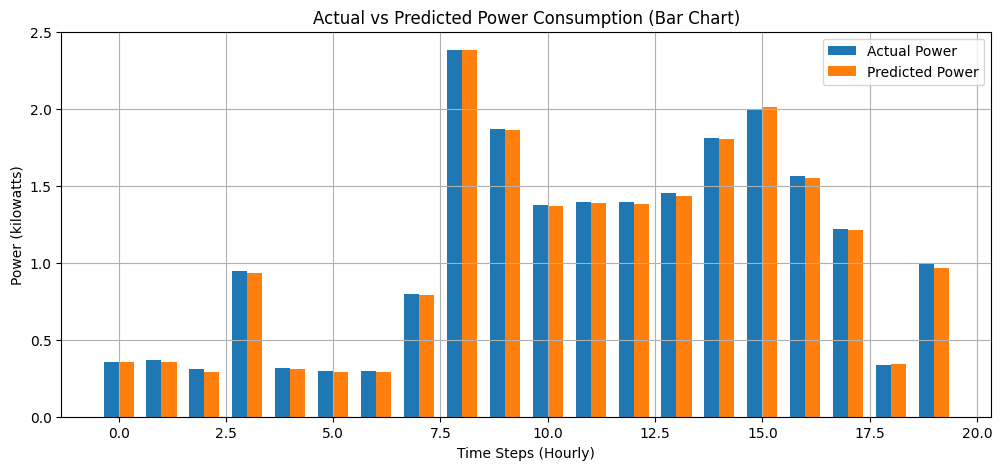

In [23]:
# Select small sample (first 20 points)
sample_size = 20
actual_sample = y_test.values[:sample_size]
pred_sample = y_pred[:sample_size]

x = np.arange(sample_size)
width = 0.35

plt.figure(figsize=(12,5))
plt.bar(x - width/2, actual_sample, width, label='Actual Power')
plt.bar(x + width/2, pred_sample, width, label='Predicted Power')

plt.xlabel("Time Steps (Hourly)")
plt.ylabel("Power (kilowatts)")
plt.title("Actual vs Predicted Power Consumption (Bar Chart)")
plt.legend()
plt.grid(True)
plt.show()


##Module 5


In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Select target column for LSTM
lstm_data = final_data[['Global_active_power']]

# Normalize data
scaler = MinMaxScaler()
lstm_scaled = scaler.fit_transform(lstm_data)
# Create sequences
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(lstm_scaled, time_steps=24)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (33809, 24, 1)
y shape: (33809, 1)


In [25]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (27047, 24, 1)
Test shape: (6762, 24, 1)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# LSTM Model Architecture
lstm_model = Sequential()

lstm_model.add(
    LSTM(
        units=50,
        activation='tanh',
        return_sequences=True,
        input_shape=(24, 1)
    )
)

lstm_model.add(Dropout(0.2))

lstm_model.add(
    LSTM(
        units=50,
        activation='tanh'
    )
)

lstm_model.add(Dense(1))

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

lstm_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = lstm_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - loss: 0.0380 - val_loss: 0.0257
Epoch 2/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - loss: 0.0221 - val_loss: 0.0226
Epoch 3/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 0.0211 - val_loss: 0.0224
Epoch 4/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0208 - val_loss: 0.0223
Epoch 5/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0202 - val_loss: 0.0223
Epoch 6/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0203 - val_loss: 0.0220
Epoch 7/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0199 - val_loss: 0.0212
Epoch 8/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0201 - val_loss: 0.0214
Epoch 9/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.0199 - val_loss: 0.0210
Epoch 10/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - loss: 0.0197 - val_loss: 0.0220
Epoch 11/30
761/761 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 0.0200 - val_loss: 0.0212
Epoch 12/30
761/761 ━━━━━━━━━━

In [28]:
lstm_model_tuned = Sequential([
    LSTM(64, return_sequences=True, input_shape=(24, 1)),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

lstm_model_tuned.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mse'
)

history_tuned = lstm_model_tuned.fit(
    X_train, y_train,
    epochs=40,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - loss: 0.0363 - val_loss: 0.0245
Epoch 2/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 0.0228 - val_loss: 0.0225
Epoch 3/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - loss: 0.0212 - val_loss: 0.0223
Epoch 4/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - loss: 0.0202 - val_loss: 0.0232
Epoch 5/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.0207 - val_loss: 0.0216
Epoch 6/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - loss: 0.0201 - val_loss: 0.0216
Epoch 7/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - loss: 0.0206 - val_loss: 0.0231
Epoch 8/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - loss: 0.0201 - val_loss: 0.0214
Epoch 9/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - loss: 0.0198 - val_loss: 0.0212
Epoch 10/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - loss: 0.0198 - val_loss: 0.0212
Epoch 11/40
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - loss: 0.0196 - val_loss: 0.0214
Epoch 12

In [29]:
baseline_pred = np.mean(y_train)
baseline_predictions = np.full(shape=y_test.shape, fill_value=baseline_pred)


##Module 6

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predictions
lstm_preds = lstm_model.predict(X_test)

# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test)
lstm_preds_inv = scaler.inverse_transform(lstm_preds)

rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_preds_inv))
mae = mean_absolute_error(y_test_inv, lstm_preds_inv)
r2 = r2_score(y_test_inv, lstm_preds_inv)

print("LSTM RMSE:", rmse)
print("LSTM MAE :", mae)
print("LSTM R2  :", r2)


212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
LSTM RMSE: 0.40587920817908824
LSTM MAE : 0.29007390374328035
LSTM R2  : 0.5739330255380463


In [31]:
baseline_rmse = np.sqrt(
    mean_squared_error(
        scaler.inverse_transform(y_test),
        scaler.inverse_transform(baseline_predictions)
    )
)

print("Baseline RMSE:", baseline_rmse)


Baseline RMSE: 0.6245320032344683


In [32]:
lstm_model.save("energy_lstm_model.h5")
print("LSTM model saved successfully")


LSTM model saved successfully


In [33]:
def predict_energy_lstm(last_24_values):
    """
    last_24_values: list of last 24 Global_active_power values
    """
    values = np.array(last_24_values).reshape(-1, 1)
    values_scaled = scaler.transform(values)
    values_scaled = values_scaled.reshape(1, 24, 1)

    prediction = lstm_model.predict(values_scaled)
    return scaler.inverse_transform(prediction)[0][0]


In [34]:
sample_input = final_data['Global_active_power'].values[-24:]
prediction = predict_energy_lstm(sample_input)

print("Predicted Next Hour Energy Consumption:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Next Hour Energy Consumption: 1.0075663


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
